In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("../data/train.csv", low_memory=False)
test_df = pd.read_csv("../data/test.csv", low_memory=False)

In [3]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test_df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40321,0x1ee8b,CUS_0xecc,October,Papadimase,25,248-56-1152,Lawyer,9413.305,1072.442083,8,...,13.0,Standard,1746.62,30.004702,18 Years and 8 Months,Yes,32.742096,73.95968062904609,High_spent_Small_value_payments,260.5424312902441
44385,0x21e2b,CUS_0xb1ca,October,Wanfeng Zhouf,41,749-18-3715,Entrepreneur,20415.41,1648.847665,7,...,6.0,Standard,245.91,32.113949,29 Years and 2 Months,Yes,163.172484,52.883231806285394,High_spent_Medium_value_payments,325.80920222057574
22838,0x121a8,CUS_0x6cda,November,Dasguptau,33,780-03-4283,Writer,16586.58,1470.215000,6,...,7.0,Bad,2424.8,33.771671,14 Years and 3 Months,Yes,22.914328,99.66940483197097,Low_spent_Small_value_payments,314.43776723208987
25524,0x14126,CUS_0xa8c6,September,Jed Horowitzm,20,214-47-2407,Media_Manager,60759.54,5031.295000,5,...,6.0,Standard,128.17,34.375717,24 Years and 3 Months,No,155.525521,539.9197456737686,Low_spent_Small_value_payments,97.68423334359487
36242,0x1bebc,CUS_0xc356,November,Alex erq,21,030-69-1962,Mechanic,83619.16,7268.263333,10,...,NaN,Bad,2947.15,24.182589,NaN,NM,584.394446,427.1752755653279,Low_spent_Large_value_payments,NaN


In [5]:
train_df["creditworthy"] = train_df["Credit_Score"].map({
    "Good": 1,
    "Standard": 1,
    "Poor": 0
})

train_df.drop(columns=["Credit_Score"], inplace=True)

In [6]:
train_df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,creditworthy
6132,0x39ee,CUS_0xa872,May,arani Krishnanj,32,247-23-2005,Doctor,79837.02,6414.085000,2,...,Good,585.77,31.562144,32 Years and 7 Months,No,66.058063,269.98899351657053,Low_spent_Medium_value_payments,585.3614432770771,1
27628,0xb7e2,CUS_0x57c,May,Tomasz Janowskiu,26,796-76-1915,Accountant,52984.53,4272.377500,8,...,Bad,3528.88,32.049775,12 Years and 2 Months,Yes,291.209144,218.3657323635415,High_spent_Small_value_payments,177.6628735901338,1
1389,0x1e23,CUS_0x64ce,June,Lopezu,21,066-73-7172,Lawyer,124419.66,NaN,3,...,Good,923.85,32.815193,32 Years and 4 Months,No,344.181536,384.98613563457087,High_spent_Medium_value_payments,542.9628287931058,1
57760,0x16872,CUS_0x22e3,January,Chang-Ranq,16,258-42-8344,Mechanic,41516.64,NaN,8,...,_,1597.61,32.537199,19 Years and 10 Months,Yes,9472.000000,318.19124890474035,Low_spent_Small_value_payments,166.3642678716769,1
86337,0x20fe3,CUS_0xa223,February,Yokok,24,330-17-7373,Engineer,28253.33,2249.444167,1,...,Good,1104.91,39.561730,25 Years and 5 Months,No,93.608031,283.8195941987351,Low_spent_Small_value_payments,137.51679113367663,1


In [7]:
drop_cols = [
    "ID",
    "Customer_ID",
    "Month",
    "SSN",
    "Name",
]

train_df.drop(columns=drop_cols, inplace=True, errors="ignore")
test_df.drop(columns=drop_cols, inplace=True, errors="ignore")

In [8]:
train_df.replace("_", np.nan, inplace=True)
test_df.replace("_", np.nan, inplace=True)

In [9]:
numeric_cols = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Monthly_Balance"
]

for col in numeric_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors="coerce")
    test_df[col] = pd.to_numeric(test_df[col], errors="coerce")


In [10]:
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.drop("creditworthy")


train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

In [11]:
train_df["debt_to_income"] = train_df["Outstanding_Debt"] / train_df["Annual_Income"]
test_df["debt_to_income"] = test_df["Outstanding_Debt"] / test_df["Annual_Income"]

train_df["debt_to_income"].replace([np.inf, -np.inf], 0, inplace=True)
test_df["debt_to_income"].replace([np.inf, -np.inf], 0, inplace=True)

In [12]:
train_df["emi_ratio"] = (
    train_df["Total_EMI_per_month"] / train_df["Monthly_Inhand_Salary"]
)

test_df["emi_ratio"] = (
    test_df["Total_EMI_per_month"] / test_df["Monthly_Inhand_Salary"]
)

train_df["emi_ratio"].replace([np.inf, -np.inf], 0, inplace=True)
test_df["emi_ratio"].replace([np.inf, -np.inf], 0, inplace=True)

In [13]:
cat_cols = train_df.select_dtypes(include=["object"]).columns

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    all_values = pd.concat([train_df[col], test_df[col]]).astype(str)
    encoder.fit(all_values)
    train_df[col] = encoder.transform(train_df[col].astype(str))
    test_df[col] = encoder.transform(test_df[col].astype(str))

In [15]:
X = train_df.drop(columns=["creditworthy"])
y = train_df["creditworthy"]

In [17]:
print(X.shape)
print(y.value_counts(normalize=True))

(100000, 24)
creditworthy
1    0.71002
0    0.28998
Name: proportion, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

In [19]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

creditworthy
1    0.710014
0    0.289986
Name: proportion, dtype: float64
creditworthy
1    0.710033
0    0.289967
Name: proportion, dtype: float64


In [20]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [23]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    print(f"\n📌 {model_name}")
    print("-" * 40)
    print(f"Accuracy : {accuracy_score(y, y_pred)*100:.2f}%")
    print(f"Precision: {precision_score(y, y_pred)*100:.2f}%")
    print(f"Recall   : {recall_score(y, y_pred)*100:.2f}%")
    print(f"F1-score : {f1_score(y, y_pred)*100:.2f}%")
    print(f"ROC-AUC  : {roc_auc_score(y, y_prob)*100:.2f}%")
    print("\nClassification Report:\n", classification_report(y, y_pred))


In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [25]:
evaluate_model(
    log_reg,
    X_test_scaled,
    y_test,
    "Logistic Regression"
)



📌 Logistic Regression
----------------------------------------
Accuracy : 76.15%
Precision: 85.58%
Recall   : 79.86%
F1-score : 82.62%
ROC-AUC  : 77.84%

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.67      0.62      8699
           1       0.86      0.80      0.83     21301

    accuracy                           0.76     30000
   macro avg       0.72      0.73      0.72     30000
weighted avg       0.77      0.76      0.77     30000



In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth = 8,
    min_samples_split = 50,
    class_weight = 'balanced',
    random_state = 42
)

dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",50
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [27]:
evaluate_model(
    dt,
    X_test,
    y_test,
    "Decision Tree"
)


📌 Decision Tree
----------------------------------------
Accuracy : 80.30%
Precision: 90.30%
Recall   : 80.94%
F1-score : 85.37%
ROC-AUC  : 85.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      8699
           1       0.90      0.81      0.85     21301

    accuracy                           0.80     30000
   macro avg       0.77      0.80      0.78     30000
weighted avg       0.82      0.80      0.81     30000



In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=50,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",50
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [29]:
evaluate_model(
    rf,
    X_test,
    y_test,
    "Random Forest"
)



📌 Random Forest
----------------------------------------
Accuracy : 80.83%
Precision: 90.77%
Recall   : 81.26%
F1-score : 85.75%
ROC-AUC  : 87.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71      8699
           1       0.91      0.81      0.86     21301

    accuracy                           0.81     30000
   macro avg       0.77      0.81      0.78     30000
weighted avg       0.83      0.81      0.81     30000



In [30]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

feature_importance_df = feature_importance_df.sort_values(
    by="importance", ascending=False
)

feature_importance_df.head(10)


,feature,importance
14,Outstanding_Debt,0.248612
6,Interest_Rate,0.153989
12,Num_Credit_Inquiries,0.101516
9,Delay_from_due_date,0.084556
22,debt_to_income,0.082162
13,Credit_Mix,0.056481
5,Num_Credit_Card,0.041949
7,Num_of_Loan,0.039162
4,Num_Bank_Accounts,0.037465
11,Changed_Credit_Limit,0.029424


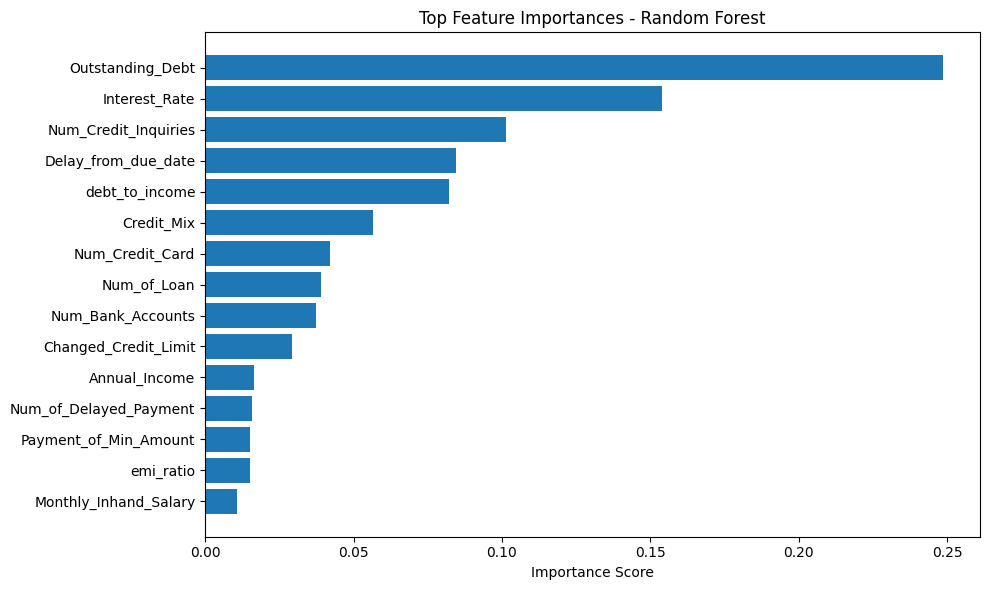

In [33]:
import matplotlib.pyplot as plt

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["feature"][:top_n][::-1],
    feature_importance_df["importance"][:top_n][::-1]
)
plt.xlabel("Importance Score")
plt.title("Top Feature Importances - Random Forest")
plt.tight_layout()
plt.show()
